In [20]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [21]:
baby <- read.csv("./Data/R_Baby_Names_1880-2014.csv")
head(baby)
tail(baby)
str(baby)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<chr>,<int>
1,Mary,F,7065,01/01/1880 12:00:00 AM,1
2,Anna,F,2604,01/01/1880 12:00:00 AM,2
3,Emma,F,2003,01/01/1880 12:00:00 AM,3
4,Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
5,Minnie,F,1746,01/01/1880 12:00:00 AM,5
6,Margaret,F,1578,01/01/1880 12:00:00 AM,6


,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<chr>,<int>
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [22]:
# baby의 year 부분 정제하기
baby$Year <- as.numeric(substring(baby$Year, 7,10))
head(baby)


,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<dbl>,<int>
1,Mary,F,7065,1880,1
2,Anna,F,2604,1880,2
3,Emma,F,2003,1880,3
4,Elizabeth,F,1939,1880,4
5,Minnie,F,1746,1880,5
6,Margaret,F,1578,1880,6


In [23]:
write.csv(baby, './Data/baby.csv', row.names = F)

In [31]:
# baby에서 여자 아이만 female이라는 dataset을 만들고 row수 구하기
#1081660개

nrow(subset(baby,baby$Gender =='F'))

Female <- subset(baby,baby$Gender =='F')

[1] 1081660

In [32]:
# 여자 이이 이름중 유일한 이름만 20개 찾기
head(unique(Female$Name),20)



[1] "Mary"      "Anna"      "Emma"      "Elizabeth" "Minnie"    "Margaret" 
 [7] "Ida"       "Alice"     "Bertha"    "Sarah"     "Annie"     "Clara"    
[13] "Ella"      "Florence"  "Cora"      "Martha"    "Laura"     "Nellie"   
[19] "Grace"     "Carrie"

In [33]:
# 여자아이 이름 종류의 갯수
   length(unique(Female$Name))

[1] 64911

In [39]:
# 가장 많이 사용된 이름 top10 구하기
library("dplyr")
                head(arrange(aggregate(Count ~ Name, Female, sum),desc(Count)),10)[1]

,Name
,<chr>
1,Mary
2,Elizabeth
3,Patricia
4,Jennifer
5,Linda
6,Barbara
7,Margaret
8,Susan
9,Dorothy


In [43]:
head(baby)
Male <- subset(baby,baby$Gender =='M')

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<dbl>,<int>
1,Mary,F,7065,1880,1
2,Anna,F,2604,1880,2
3,Emma,F,2003,1880,3
4,Elizabeth,F,1939,1880,4
5,Minnie,F,1746,1880,5
6,Margaret,F,1578,1880,6


In [45]:
 fdata <- aggregate(Count ~ Year, Female, sum)

mdata <- aggregate(Count ~ Year, Male, sum)

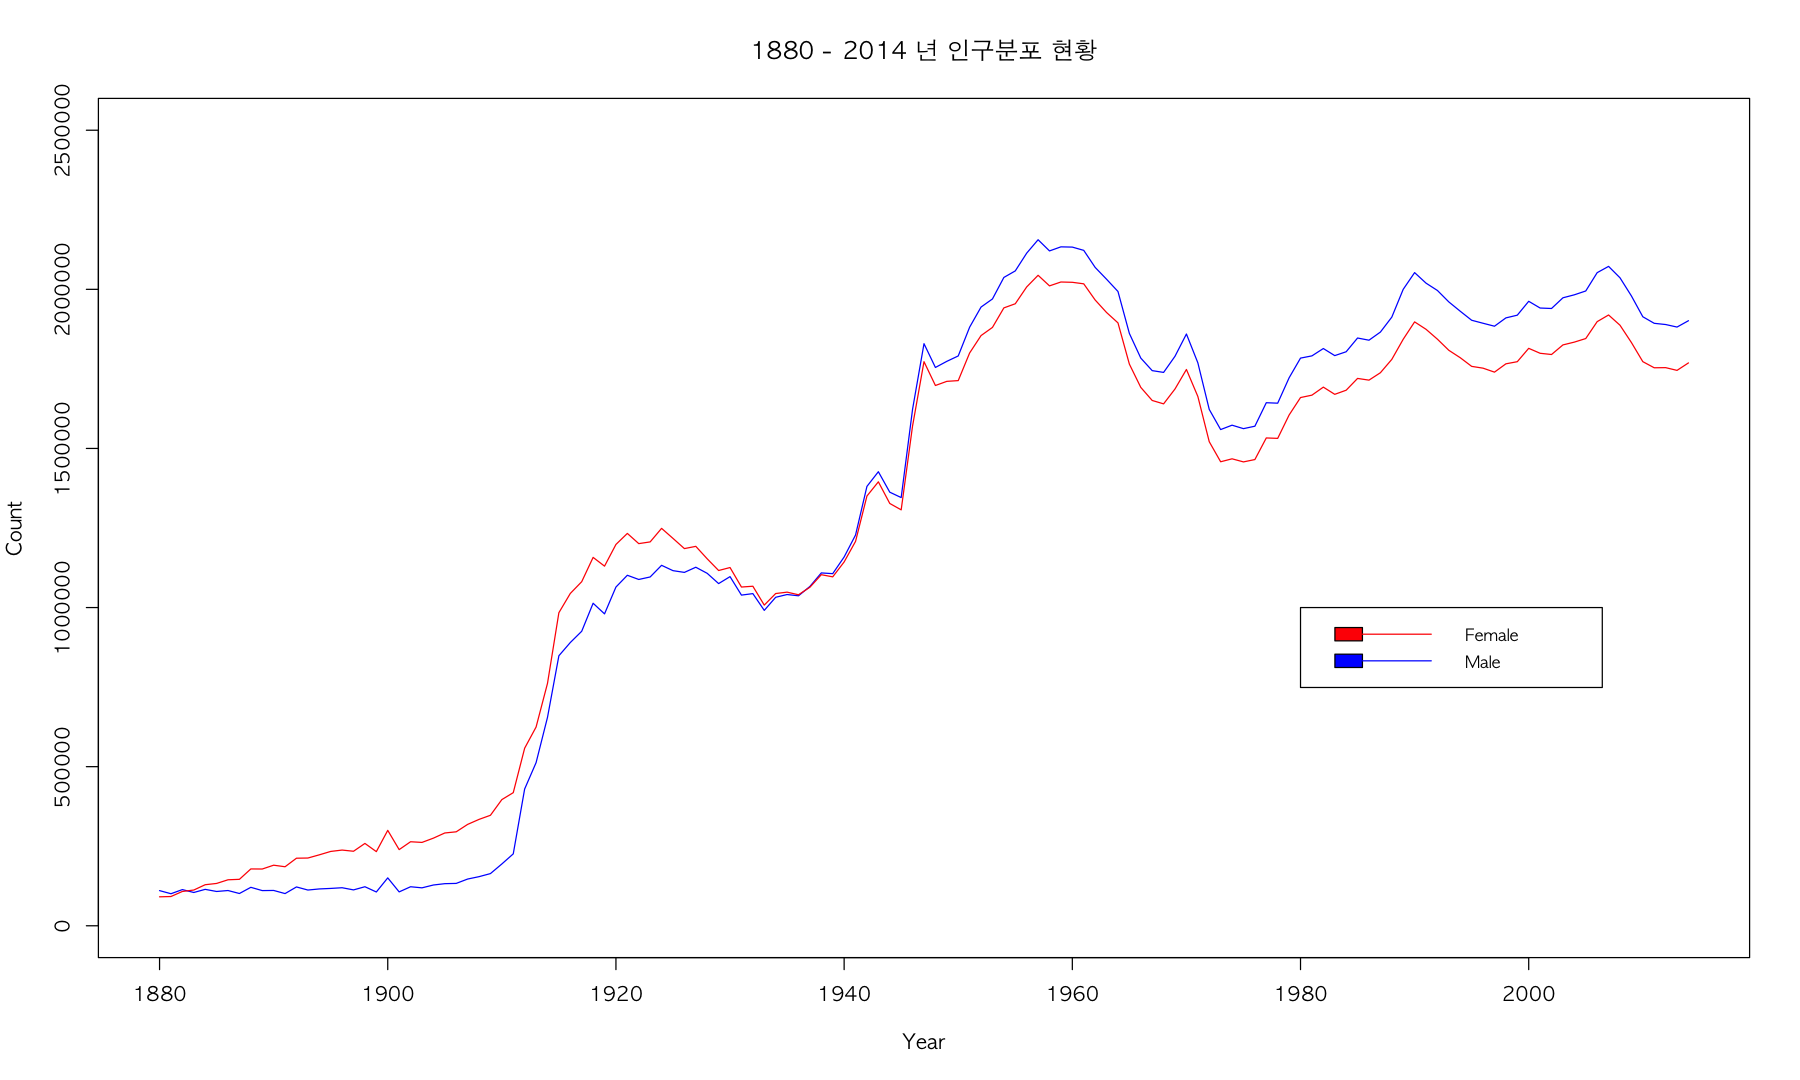

In [70]:
par(family = "AppleGothic", bg="white")
# 선그래프
plot(mdata,
# 점은 'o' 선은 'l'
     type= "l",
     ylim= c(0,2500000),
     main = "1880 - 2014 년 인구분포 현황",
     col = 'blue',
     lty =1 

     )

# 다른 줄 긋기
     lines(fdata,
# 
type ="l",
 col ='red',
 lty = 1
)

legend(1980,1000000,
    c("Female", "Male"),
    col= c("red","blue"),
    # 선 유형 정하기 ( 1번유형부터 ~ )
    lty = c(1,1),
    # 점모양 지정
    #pch = c(21,22),
    cex = 0.8,
    fill=  c("red","blue"),
)
